In [29]:
#%%imports
using CSV
using DataFrames
using Glob
using NaNStatistics
using Plots
using Random
using Revise

include(joinpath(@__DIR__, "../src/LVisP.jl"))
using .LVisP


In [ ]:
#%%data loading
fnames = Glob.glob("*.csv", joinpath(@__DIR__,"../data/"))
println(fnames)
fname = fnames[1]
df = DataFrame(CSV.File(fname))

encoding_pb_lsst = Dict(   #LSST passbands in nm (https://ui.adsabs.harvard.edu/abs/2021A%26A...646A.110H/abstract)
    "u"=>361.7, "g"=>482.7, "r"=>622.3, "i"=>754.6, "z"=>869.1, "Y"=>971.2,
)
encoding_pb_des = Dict(     #DES passbands in nm (https://noirlab.edu/science/programs/ctio/filters/Dark-Energy-Camera)
    # "u"=>355, "g"=>473, "r"=>642, "i"=>784, "z"=>926, "Y"=>1009,
    361.7=>355, 482.7=>473, 622.3=>642, 754.6=>784, 869.1=>926, 971.2=>1009,
)

# for f in fnames

#     if occursin("des.csv", f)
#         # println(f, " ", encoding_pb_des)

#         df = DataFrame(CSV.File(f))
#         transform!(df,:flt_nm => ByRow(pb -> encoding_pb_des[pb]); renamecols=false)
#         # rename!(df, :flt=>:flt_nm)
#         # display(df)
#         CSV.write(f, df)
#     end

# end

df_raw = subset(df, :processing => p -> p .== "raw")    #raw
df_pro = subset(df, :processing => p -> p .!= "raw")    #processed

theta_raw = sort(unique(df_raw[!,1]))
x_raw = map(x -> Vector(x[!,2]), collect(groupby(df_raw, 1; sort=true)))
y_raw = map(y -> Vector(y[!,3]), collect(groupby(df_raw, 1; sort=true)))
theta_pro = sort(unique(df_pro[!,1]))
x_pro = map(x -> Vector(x[!,2]), collect(groupby(df_pro, 1; sort=true)))
y_pro = map(y -> Vector(y[!,3]), collect(groupby(df_pro, 1; sort=true)))


Row,flt_nm,mjd,fluxcal,fluxcalerr,processing
,Int64,Float64,Float64,Float64,String3
1,473,57327.1,14.7047,2.4517,raw
2,473,57331.2,20.0926,1.84321,raw
3,473,57339.2,33.1084,2.08511,raw
4,473,57345.3,25.7804,2.18817,raw
5,473,57356.1,19.2946,2.224,raw
6,473,57365.2,13.9447,1.24402,raw
7,473,57372.1,9.03347,1.61743,raw
8,784,57331.2,28.0955,2.44537,raw
9,784,57339.2,41.2552,2.09551,raw


Row,flt_nm,mjd,fluxcal,fluxcalerr,processing
,Int64,Float64,Float64,Float64,String3
1,473,56949.3,102.935,3.23104,raw
2,473,56956.3,130.752,6.82071,raw
3,473,56960.3,140.431,5.69084,raw
4,473,56966.4,155.403,26.3164,raw
5,473,56973.3,159.327,8.9796,raw
6,473,56980.3,137.156,3.48883,raw
7,473,56988.0,103.84,5.57313,raw
8,473,56991.2,106.124,11.5415,raw
9,473,56992.1,114.454,10.2134,raw


Row,flt_nm,mjd,fluxcal,fluxcalerr,processing
,Int64,Float64,Float64,Float64,String3
1,473,57331.2,18.5519,4.75783,raw
2,473,57339.2,71.8795,5.47144,raw
3,473,57345.2,72.7389,6.26425,raw
4,473,57365.1,20.9353,3.29969,raw
5,473,57372.1,21.7103,4.63215,raw
6,473,57385.1,13.7506,3.52087,raw
7,784,57327.1,27.4738,6.97126,raw
8,784,57331.2,42.6945,8.19001,raw
9,784,57339.2,124.529,8.63595,raw


Row,flt_nm,mjd,fluxcal,fluxcalerr,processing
,Int64,Float64,Float64,Float64,String3
1,473,57345.2,39.2201,6.56762,raw
2,473,57355.2,137.268,11.4461,raw
3,473,57365.1,123.307,4.98669,raw
4,473,57372.1,79.9489,6.81934,raw
5,473,57385.1,62.6507,5.52825,raw
6,473,57389.1,53.5296,5.7471,raw
7,473,57396.1,51.9685,5.90182,raw
8,473,57403.1,25.6397,7.01834,raw
9,784,57355.2,142.178,9.48873,raw


Row,flt_nm,mjd,fluxcal,fluxcalerr,processing
,Int64,Float64,Float64,Float64,String3
1,473,56950.1,77.5569,3.36423,raw
2,473,56957.1,365.961,5.58398,raw
3,473,56963.3,256.705,8.49556,raw
4,473,56973.1,117.326,2.33053,raw
5,473,56980.2,75.6361,1.80228,raw
6,473,56987.2,36.5293,2.12561,raw
7,473,56990.2,31.0983,2.66918,raw
8,473,57005.2,17.8235,3.5722,raw
9,473,57018.2,12.5507,3.109,raw


Row,flt_nm,mjd,fluxcal,fluxcalerr,processing
,Int64,Float64,Float64,Float64,String3
1,473,57252.3,99.5801,5.04405,raw
2,473,57256.3,112.921,7.71081,raw
3,473,57257.3,106.539,5.86112,raw
4,473,57266.3,137.993,18.1453,raw
5,473,57276.4,40.6458,6.15737,raw
6,473,57277.4,40.0441,3.97134,raw
7,473,57302.3,23.4662,3.96597,raw
8,473,57311.3,15.7592,3.69956,raw
9,473,57329.2,19.4544,6.26257,raw


Row,flt_nm,mjd,fluxcal,fluxcalerr,processing
,Int64,Float64,Float64,Float64,String3
1,473,57012.1,20.5617,3.20493,raw
2,473,57018.1,65.9781,8.22595,raw
3,473,57019.1,90.9683,8.06243,raw
4,473,57026.2,213.401,16.5445,raw
5,473,57033.2,217.974,8.55251,raw
6,473,57040.2,58.2391,3.54234,raw
7,473,57047.1,26.5957,3.77477,raw
8,473,57066.0,33.6365,7.18283,raw
9,784,57012.1,25.6809,5.49974,raw


Row,flt_nm,mjd,fluxcal,fluxcalerr,processing
,Int64,Float64,Float64,Float64,String3
1,473,56534.2,33.8358,5.83843,raw
2,473,56537.2,34.8472,7.48431,raw
3,473,56543.3,66.5211,3.93352,raw
4,473,56547.2,56.5006,4.8437,raw
5,473,56563.2,13.7093,3.56961,raw
6,473,56567.2,15.1703,4.60565,raw
7,473,56594.1,24.8365,7.91711,raw
8,784,56537.2,111.108,11.4159,raw
9,784,56543.3,153.168,7.41935,raw


Row,flt_nm,mjd,fluxcal,fluxcalerr,processing
,Int64,Float64,Float64,Float64,String3
1,473,56949.0,46.294,3.94872,raw
2,473,56956.0,95.363,4.1906,raw
3,473,56960.2,118.717,5.62617,raw
4,473,56973.0,57.9607,3.82137,raw
5,473,56980.0,73.0792,3.31771,raw
6,473,56987.0,40.7856,3.61242,raw
7,473,56991.1,56.9825,13.4976,raw
8,473,56992.0,31.9913,8.00755,raw
9,473,57002.1,35.744,3.43471,raw


Row,flt_nm,mjd,fluxcal,fluxcalerr,processing
,Int64,Float64,Float64,Float64,String3
1,473,57345.3,27.0462,2.18644,raw
2,473,57356.1,42.6332,2.23208,raw
3,473,57365.2,50.2341,1.28684,raw
4,473,57372.1,49.0069,1.64848,raw
5,473,57376.2,52.1165,6.43975,raw
6,473,57385.2,34.5898,3.10963,raw
7,473,57389.1,34.5,2.46274,raw
8,473,57394.2,28.9477,2.49152,raw
9,473,57399.2,20.7361,2.4941,raw


Row,flt_nm,mjd,fluxcal,fluxcalerr,processing
,Int64,Float64,Float64,Float64,String3
1,473,57355.1,50.0793,8.09096,raw
2,473,57356.1,59.3274,3.53351,raw
3,473,57365.0,69.4784,4.57022,raw
4,473,57366.0,65.551,3.91172,raw
5,473,57373.0,56.366,9.47532,raw
6,473,57379.0,60.3547,11.7689,raw
7,473,57386.0,21.28,4.93284,raw
8,473,57389.1,14.5066,3.99033,raw
9,473,57394.1,23.1629,4.14153,raw


Row,flt_nm,mjd,fluxcal,fluxcalerr,processing
,Int64,Float64,Float64,Float64,String3
1,473,56575.0,39.7195,3.57754,raw
2,473,56579.0,59.3614,9.90822,raw
3,473,56590.0,72.1593,10.2435,raw
4,473,56594.0,46.6015,3.32535,raw
5,473,56602.0,23.1331,2.9373,raw
6,473,56625.2,14.9172,3.45546,raw
7,473,56628.0,16.6037,3.05352,raw
8,473,56657.0,13.289,3.97938,raw
9,784,56575.0,126.369,5.51383,raw


Row,flt_nm,mjd,fluxcal,fluxcalerr,processing
,Int64,Float64,Float64,Float64,String3
1,473,57356.1,425.639,6.67173,raw
2,473,57366.1,973.667,11.1185,raw
3,473,57373.1,431.061,13.5228,raw
4,473,57385.1,169.573,7.32392,raw
5,473,57389.1,167.792,7.88061,raw
6,473,57396.1,112.194,6.75165,raw
7,473,57403.1,87.0318,7.04626,raw
8,473,57427.1,35.3715,9.84286,raw
9,784,57356.1,497.166,6.88684,raw


Row,flt_nm,mjd,fluxcal,fluxcalerr,processing
,Int64,Float64,Float64,Float64,String3
1,473,56915.3,57.1281,8.87941,raw
2,473,56923.3,103.417,5.86507,raw
3,473,56927.3,113.844,5.22696,raw
4,473,56932.2,134.149,6.21567,raw
5,473,56943.2,140.55,9.05154,raw
6,473,56952.1,139.776,4.51049,raw
7,473,56957.1,146.946,8.26894,raw
8,473,56959.1,143.753,5.15574,raw
9,473,56964.2,127.259,10.356,raw


Row,flt_nm,mjd,fluxcal,fluxcalerr,processing
,Int64,Float64,Float64,Float64,String3
1,473,56943.2,30.2825,6.15245,raw
2,473,56949.3,98.9527,3.51157,raw
3,473,56956.3,147.958,6.78304,raw
4,473,56960.3,142.229,5.65266,raw
5,473,56966.4,108.446,16.2872,raw
6,473,56973.3,67.2403,7.19661,raw
7,473,56980.3,28.9408,2.56874,raw
8,473,56988.0,15.9688,4.47887,raw
9,473,57012.1,11.2046,2.63182,raw


Row,flt_nm,mjd,fluxcal,fluxcalerr,processing
,Int64,Float64,Float64,Float64,String3
1,473,56645.1,31.0534,9.25201,raw
2,473,56649.2,40.3816,8.32004,raw
3,473,56653.1,80.9481,5.80098,raw
4,473,56660.1,56.074,3.03918,raw
5,473,56667.1,37.9498,7.02662,raw
6,473,56682.1,16.8686,3.15818,raw
7,473,56686.1,24.8212,3.9827,raw
8,473,56693.0,33.4988,5.12035,raw
9,784,56645.1,50.8752,8.03835,raw


Row,flt_nm,mjd,fluxcal,fluxcalerr,processing
,Int64,Float64,Float64,Float64,String3
1,473,57311.4,10.7728,3.20938,raw
2,473,57315.2,43.3084,4.73218,raw
3,473,57319.1,117.157,22.2891,raw
4,473,57325.1,165.952,13.7658,raw
5,473,57329.2,185.859,5.35164,raw
6,473,57332.1,183.95,5.87911,raw
7,473,57339.3,124.334,4.68358,raw
8,473,57345.3,84.7731,5.30422,raw
9,473,57365.2,17.277,2.31898,raw


Row,flt_nm,mjd,fluxcal,fluxcalerr,processing
,Int64,Float64,Float64,Float64,String3
1,473,56980.2,13.6905,1.41056,raw
2,473,56987.2,36.6069,1.78467,raw
3,473,56990.2,44.3559,2.35157,raw
4,473,57001.2,13.9353,3.56459,raw
5,473,57005.2,13.171,3.49468,raw
6,473,57018.2,8.36286,2.68683,raw
7,473,57063.0,10.3235,2.07898,raw
8,784,56980.2,29.2677,1.81371,raw
9,784,56987.2,62.9832,1.7688,raw


Row,flt_nm,mjd,fluxcal,fluxcalerr,processing
,Int64,Float64,Float64,Float64,String3
1,473,57356.1,56.5137,3.18942,raw
2,473,57366.1,77.802,3.82605,raw
3,473,57373.1,69.4797,6.4647,raw
4,473,57385.1,67.326,5.82199,raw
5,473,57389.1,63.9389,5.15918,raw
6,473,57396.1,69.1224,4.6265,raw
7,473,57403.1,52.5498,6.25128,raw
8,473,57427.1,47.2909,7.35845,raw
9,784,57346.0,29.3109,7.89657,raw


Row,flt_nm,mjd,fluxcal,fluxcalerr,processing
,Int64,Float64,Float64,Float64,String3
1,473,56602.1,335.823,2.36017,raw
2,473,56607.1,448.016,10.3456,raw
3,473,56617.0,575.297,4.20516,raw
4,473,56625.2,574.432,3.21158,raw
5,473,56629.1,549.184,6.01661,raw
6,473,56635.3,488.762,4.59714,raw
7,473,56646.1,358.661,3.41241,raw
8,473,56653.1,295.146,4.85099,raw
9,473,56660.1,237.766,2.37417,raw


Row,flt_nm,mjd,fluxcal,fluxcalerr,processing
,Int64,Float64,Float64,Float64,String3
1,473,57325.0,128.271,7.96928,raw
2,473,57325.0,133.842,5.75775,raw
3,473,57329.0,203.084,8.27021,raw
4,473,57329.0,227.052,8.64087,raw
5,473,57334.2,299.699,9.05484,raw
6,473,57334.2,324.055,12.4926,raw
7,473,57339.0,188.121,8.64945,raw
8,473,57340.1,176.392,7.4936,raw
9,473,57342.0,135.608,5.53359,raw


["/home/lukas/github/LVisP/src_jl_demo/../data/11370314_snib_des.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/114645810_snibc_elasticc.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/11500415_sniin_des.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/120712717_snibc_elasticc.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/122276966_snibc_elasticc.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/124266324_snii_elasticc.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/132358631_snii_elasticc.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/13686088_snia_des.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/15108182_snic_des.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/18213902_sniip_des.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/1853138_sniil2_des.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/21794560_snib_des.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/21951066_sniil2_des.csv", "/home/lukas/github/LVisP/src_jl_demo/../data/22502

4-element Vector{Vector{Float64}}:
 [131.85135347636697, 144.1021324197532, 157.33985146884717, 171.54666563787592, 186.7104763080241, 202.82398191037262, 219.8786288886406, 237.52220402761614, 254.8785917492893, 271.0165312048977  …  21.636096472861272, 22.117287651481657, 22.171735142892068, 21.70984919768864, 20.818301317590425, 19.60389009958537, 18.167538047200992, 16.605841970695074, 15.012571758986956, 13.480134346142687]
 [199.51680665476184, 221.15966474939793, 245.022972998351, 271.3714328541194, 300.48527128755495, 332.65972927132935, 367.58101841027036, 403.48512568249845, 438.402469818291, 470.3498430261352  …  53.39069443803396, 53.876705441583795, 53.24016517017526, 52.29678289500703, 51.923618940086726, 52.874772855916376, 55.04605689389905, 57.97826806118758, 61.2160176919632, 64.3054119261393]
 [190.6796496307728, 210.55152436275173, 232.4930857357034, 256.94257086056166, 284.3527151123717, 315.1925589265791, 349.4632396620398, 385.9184677271071, 423.12007784289, 459.

In [3]:
#%%get stats
unique_thetas = unique(theta_raw)
nthetas = length(unique_thetas)

display(unique_thetas)
display(nthetas)

4-element Vector{Float64}:
 482.7
 622.3
 754.6
 869.1

4

In [ ]:
#%%get required parameters
thetalims = (minimum(theta_raw), maximum(theta_raw)+nanmean(diff(theta_raw)))
xticks = Int.(round.(collect(range(minimum(minimum.(x_raw)), maximum(maximum.(x_raw)), 5)); digits=0))
yticks = Int.(round.(collect(range(minimum(minimum.(y_raw)), maximum(maximum.(y_raw)), 5)); digits=0))

# display(thetalims)
# display(xticks)

([57327, 57352, 57377, 57401, 57426], ["57327 nm", "57352 nm", "57377 nm", "57401 nm", "57426 nm"])

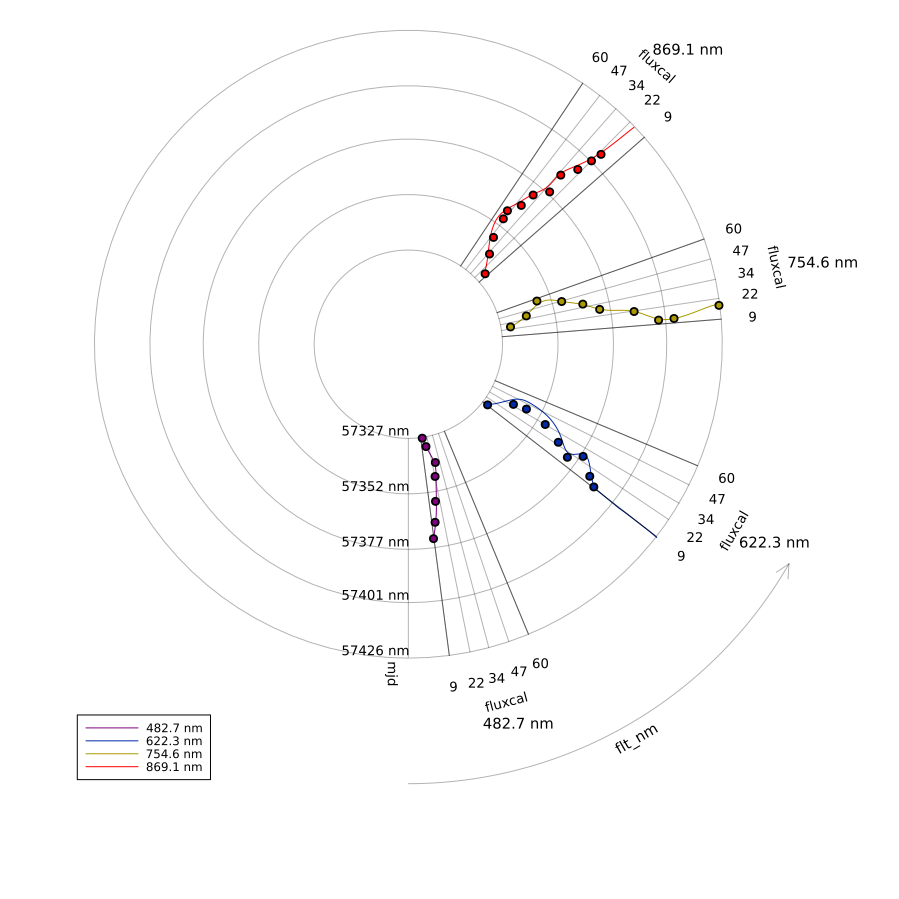

In [28]:
#%%plotting
LVPC = LVisP.LVisPCanvas(
    thetalims=thetalims, xticks=xticks,
    thetaguidelims=(-pi/2,3pi/2), thetaplotlims=(-pi/2+pi/12,pi/2), xlimdeadzone=0.3, panelsize=pi/12,
    thetalabel=names(df_raw)[1], xlabel=names(df_raw)[2], ylabel=names(df_raw)[3],
    th_arrowlength=pi/3,
    panelbounds=true, ygrid=true,
    fontsizes=(thetalabel=10, ylabel=9, xlabel=9, thetaticklabel=10, xticklabel=9, yticklabel=9),
    thetaarrowkwargs=(color=:black, alpha=0.3),
    thetaticklabelkwargs=(halign=:center,),
    thetalabelkwargs=(halign=:center,),
    xtickkwargs=(linecolor=:black, linealpha=0.3,),
    xticklabelkwargs=(rotation=0, halign=:right, valign=:bottom),
    xlabelkwargs=(rotation=-90, halign=:center,),
    ygridkwargs=(linecolor=:black, linealpha=0.3, linestyle=:solid,),
    yticklabelkwargs=(rotation=0,),
    # ylabelkwargs=(rotation=0,),
    panelboundskwargs=(linecolor=:black, linealpha=0.5, linestyle=:solid,),
)
    
colors = palette(:rainbow, nthetas)

p = LVisP.plot(
    LVPC,
    theta_pro, x_pro, y_pro;
    yticks=yticks,
    thetaticklabels=["$thtl nm" for thtl in unique_thetas],
    plot_kwargs=[Dict(
        :lc=>colors[i], :label=>"$(unique_thetas[i]) nm",
        :seriestype=>:path,
    ) for i in eachindex(unique_thetas)]
)
plot!(p;
    size=(900,900),
    leftmargin=0Plots.mm, rightmargin=15Plots.mm,
)

LVisP.plot!(
    LVPC,
    theta_raw, x_raw, y_raw;
    yticks=yticks,
    thetaticklabels=nothing,
    data_only=true,
    plot_kwargs=[
    Dict(
        :mc=>colors[i], :label=>"",
        :seriestype=>:scatter,
    ) for i in eachindex(unique_thetas)]
)

display(p)